In [1]:
from scipy.linalg import hadamard
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import scipy.fftpack as spfft
from sklearn.linear_model import Lasso

In [3]:
def idct2(x):
        return spfft.idct(spfft.idct(x.T, norm='ortho', axis=0).T, norm='ortho', axis=0)

alpha=1E-4
max_iter=1E3

In [4]:
def reconstruct_frame(frame, lasso):
    ny, nx = frame.shape
    A = np.kron(
        spfft.idct(np.identity(nx), norm='ortho', axis=0),
        spfft.idct(np.identity(ny), norm='ortho', axis=0)
        )

    flat_frame = frame.T.reshape(-1,1)
    idx_nonzero = np.where(flat_frame != 0)[0]

    # compressed sample
    b = flat_frame[idx_nonzero]
    # compression matrix @ transform matrix
    Ac = A[idx_nonzero,:]

    # LASSO optimization
    lasso.fit(Ac, b)

    # Reconstruct frame
    Xat = np.array(lasso.coef_).reshape(nx, ny).T # stack columns

    # Get the reconstructed frame
    Xa = idct2(Xat)

    return Xa

In [5]:
image = imread('../dog.jpg')
bw_image = np.mean(image, -1); # Convert RGB to grayscale

(-0.5, 1499.5, 1999.5, -0.5)

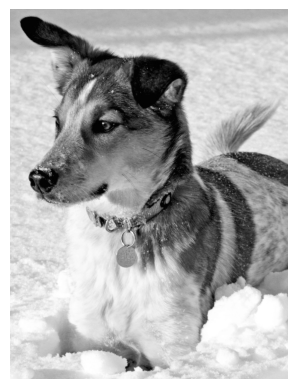

In [6]:
plt.figure()
plt.imshow(bw_image,cmap='gray')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

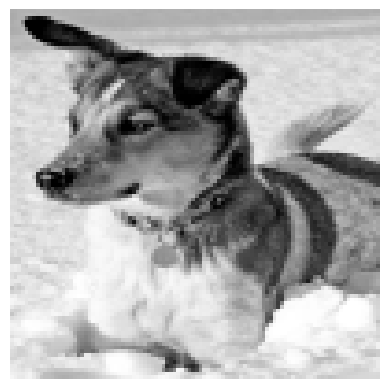

In [7]:
frame = cv2.resize(bw_image, (100,100), interpolation=cv2.INTER_AREA)
plt.figure()
plt.imshow(frame,cmap='gray')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

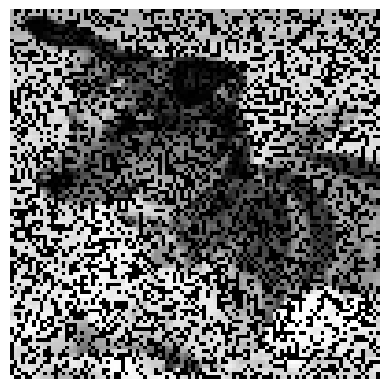

In [8]:
noise = 0.4
noisemask = np.random.choice(a=[False, True], size=frame.shape, p=[noise, 1.0-noise])
noisyframe = noisemask * frame
plt.figure()
plt.imshow(noisyframe,cmap='gray')
plt.axis('off')

In [9]:
lasso = Lasso(alpha=alpha, max_iter=int(max_iter), warm_start=True, selection="random")
new_img = reconstruct_frame(noisyframe, lasso)

(-0.5, 99.5, 99.5, -0.5)

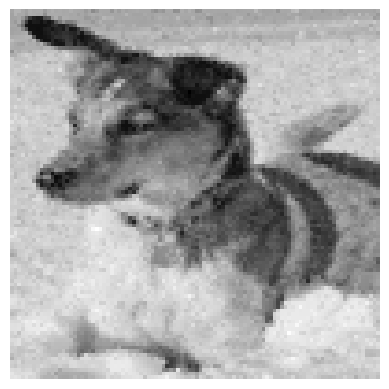

In [10]:
plt.figure()
plt.imshow(new_img,cmap='gray')
plt.axis('off')